In [4]:
import csv

def clean_faculty_data(input_file, output_file):
    """
    Clean faculty data by standardizing faculty names
    """
    # Define faculty mapping for standardization
    faculty_mapping = {
        'Fakulteta za matematiko in fiziko (Faculty of Mathematics and Physics)': 
            'Fakulteta za matematiko in fiziko (Faculty of Mathematics and Physics) UL',
        'Fakulteta za matematiko in fiziko (Faculty of Mathematics and Physics) UL': 
            'Fakulteta za matematiko in fiziko (Faculty of Mathematics and Physics) UL',
        'Fakulteta za elektrotehniko, računalništvo in informatiko (Faculty of Electrical Engineering and Computer Science) UM': 
            'Fakulteta za elektrotehniko, računalništvo in informatiko (Faculty of Electrical Engineering and Computer Science) UM',
        'Fakulteta za računalništvo in informatiko (Faculty of Computer and Information Science) UL': 
            'Fakulteta za računalništvo in informatiko (Faculty of Computer and Information Science) UL',
        'Fakulteta za računalništvo in informatiko (Faculty of Computer and Information Science)': 
            'Fakulteta za računalništvo in informatiko (Faculty of Computer and Information Science) UL',
        'Fakulteta za elektrotehniko (Faculty of Electrical Engineering) UL': 
            'Fakulteta za elektrotehniko (Faculty of Electrical Engineering) UL'
    }
    
    cleaned_data = []
    
    # Read the CSV data
    with open(input_file, 'r', encoding='utf-8') as file:
        reader = csv.reader(file)
        for row in reader:
            if len(row) > 2:  # Make sure there's a faculty column
                original_faculty = row[2].strip()
                
                # Clean the faculty name
                if original_faculty in faculty_mapping:
                    row[2] = faculty_mapping[original_faculty]
                else:
                    # For any unrecognized faculty names, keep them as is or handle as needed
                    print(f"Unrecognized faculty: {original_faculty}")
                
            cleaned_data.append(row)
    
    # Write cleaned data to new file
    with open(output_file, 'w', encoding='utf-8', newline='') as file:
        writer = csv.writer(file)
        writer.writerows(cleaned_data)
    
    print(f"Data cleaned successfully! Output saved to {output_file}")

# Alternative function if you have the data as a string
def clean_faculty_data_from_string(data_string):
    """
    Clean faculty data from a string (like the one you provided)
    """
    faculty_mapping = {
        'Fakulteta za matematiko in fiziko (Faculty of Mathematics and Physics)': 
            'Fakulteta za matematiko in fiziko (Faculty of Mathematics and Physics) UL',
        'Fakulteta za matematiko in fiziko (Faculty of Mathematics and Physics) UL': 
            'Fakulteta za matematiko in fiziko (Faculty of Mathematics and Physics) UL',
        'Fakulteta za elektrotehniko, računalništvo in informatiko (Faculty of Electrical Engineering and Computer Science) UM': 
            'Fakulteta za elektrotehniko, računalništvo in informatiko (Faculty of Electrical Engineering and Computer Science) UM',
        'Fakulteta za računalništvo in informatiko (Faculty of Computer and Information Science) UL': 
            'Fakulteta za računalništvo in informatiko (Faculty of Computer and Information Science) UL',
        'Fakulteta za elektrotehniko (Faculty of Electrical Engineering) UL': 
            'Fakulteta za elektrotehniko (Faculty of Electrical Engineering) UL'
    }
    
    lines = data_string.strip().split('\n')
    cleaned_lines = []
    
    for line in lines:
        parts = line.split('","')
        if len(parts) > 2:
            original_faculty = parts[2].strip('"')
            if original_faculty in faculty_mapping:
                parts[2] = faculty_mapping[original_faculty]
            # For the specific case in your data where faculty ends with "UL"
            elif original_faculty.endswith(' UL') and original_faculty not in faculty_mapping:
                # Extract base faculty name and map it
                base_faculty = original_faculty[:-3].strip()
                if base_faculty in faculty_mapping:
                    parts[2] = faculty_mapping[base_faculty]
        
        cleaned_lines.append('","'.join(parts))
    
    return '\n'.join(cleaned_lines)


In [5]:
input_file = 'answers_26-11.csv'
output_file = 'answers_26-11_cleaned.csv'
clean_faculty_data(input_file, output_file)

Unrecognized faculty: Na kateri fakulteti študirate? (At which faculty do you study?)
Data cleaned successfully! Output saved to answers_26-11_cleaned.csv


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def analyze_phone_survey_data(csv_file):
    """
    Analyze phone survey data focusing on:
    1. Age vs Phone Age
    2. Reasons for changing phones
    3. Disposition of old phones
    4. Phone age vs replacement timeline
    """
    
    # Read the CSV file
    df = pd.read_csv(csv_file)
    
    print("=== PHONE SURVEY DATA ANALYSIS ===\n")
    print(f"Available columns: {df.columns.tolist()}\n")
    
    # Clean and prepare the data
    df_clean = clean_data(df)
    
    # Perform analyses
    analyze_age_vs_phone_age(df_clean)
    analyze_replacement_reasons(df_clean)
    analyze_phone_disposition(df_clean)
    analyze_replacement_timeline(df_clean)
    
    return df_clean

def clean_data(df):
    """Clean and prepare the survey data"""
    df_clean = df.copy()
    
    # Print column names to debug
    print("Column names in dataset:")
    for i, col in enumerate(df_clean.columns):
        print(f"{i}: '{col}'")
    
    # Extract phone age from the purchase year
    def extract_phone_age(purchase_text):
        if pd.isna(purchase_text):
            return np.nan
        purchase_text = str(purchase_text).lower()
        
        if '2025' in purchase_text or 'letos' in purchase_text or 'this year' in purchase_text:
            return 0
        elif '2024' in purchase_text or 'lani' in purchase_text or 'last year' in purchase_text:
            return 1
        elif '2023' in purchase_text or '2 leti' in purchase_text or '2 years' in purchase_text:
            return 2
        elif '2022' in purchase_text or '3 leti' in purchase_text or '3 years' in purchase_text:
            return 3
        elif '2021' in purchase_text or '4 leti' in purchase_text or '4 years' in purchase_text:
            return 4
        elif '2020' in purchase_text or '5 leti' in purchase_text or '5 years' in purchase_text:
            return 5
        else:
            return np.nan
    
    # Use the correct column index for purchase date (column 14)
    df_clean['phone_age_years'] = df_clean.iloc[:, 14].apply(extract_phone_age)
    
    # Extract replacement timeline
    def extract_replacement_timeline(replace_text):
        if pd.isna(replace_text):
            return np.nan
        replace_text = str(replace_text).lower()
        
        if '6 mesecih' in replace_text or '6 months' in replace_text:
            return 0.5
        elif 'naslednjem letu' in replace_text or 'next year' in replace_text:
            return 1
        elif '2 leti' in replace_text or '2 years' in replace_text:
            return 2
        elif '3 leta' in replace_text or '3 years' in replace_text:
            return 3
        elif '4 leta' in replace_text or '4 years' in replace_text:
            return 4
        elif '5 let' in replace_text or '5 years' in replace_text:
            return 5
        elif 'dokler deluje' in replace_text or 'as long as it works' in replace_text:
            return 10  # Special value for "as long as it works"
        else:
            return np.nan
    
    # Use the correct column index for replacement timeline (column 15)
    df_clean['replacement_timeline_years'] = df_clean.iloc[:, 15].apply(extract_replacement_timeline)
    
    return df_clean

def analyze_age_vs_phone_age(df):
    """Analyze relationship between person's age and phone age"""
    print("1. AGE vs PHONE AGE ANALYSIS")
    print("-" * 40)
    
    # Use column index 1 for age (second column)
    age_data = df.iloc[:, 1]
    phone_age_data = df['phone_age_years']
    
    # Remove rows with missing age or phone age
    valid_mask = ~age_data.isna() & ~phone_age_data.isna()
    age_phone_data = df[valid_mask].copy()
    age_phone_data['age'] = age_phone_data.iloc[:, 1]
    age_phone_data['phone_age'] = age_phone_data['phone_age_years']
    
    if len(age_phone_data) > 0:
        # Scatter plot
        plt.figure(figsize=(10, 6))
        plt.scatter(age_phone_data['age'], age_phone_data['phone_age'], 
                   alpha=0.7, s=60)
        plt.xlabel('Person\'s Age')
        plt.ylabel('Phone Age (years)')
        plt.title('Age vs Phone Age')
        plt.grid(True, alpha=0.3)
        
        # Add trend line
        z = np.polyfit(age_phone_data['age'], age_phone_data['phone_age'], 1)
        p = np.poly1d(z)
        plt.plot(age_phone_data['age'], p(age_phone_data['age']), 
                "r--", alpha=0.8, label=f'Trend: y = {z[0]:.2f}x + {z[1]:.2f}')
        plt.legend()
        
        plt.tight_layout()
        plt.show()
        
        # Statistics
        correlation = age_phone_data['age'].corr(age_phone_data['phone_age'])
        print(f"Correlation between age and phone age: {correlation:.3f}")
        print(f"Average phone age: {age_phone_data['phone_age'].mean():.1f} years")
        print(f"Oldest phone: {age_phone_data['phone_age'].max():.1f} years")
        print(f"Youngest phone: {age_phone_data['phone_age'].min():.1f} years")
        
        # Age distribution of phones
        print("\nPhone age distribution:")
        print(age_phone_data['phone_age'].value_counts().sort_index())
    else:
        print("No valid age/phone age data available")
    print()

def analyze_replacement_reasons(df):
    """Analyze reasons for changing previous vs current phone"""
    print("2. REPLACEMENT REASONS ANALYSIS")
    print("-" * 40)
    
    # Use correct column indices
    # Column 18: Why did you replace previous phone
    # Column 16: Why plan to replace current phone
    prev_reasons = df.iloc[:, 18].dropna()
    future_reasons = df.iloc[:, 16].dropna()
    
    # Clean and categorize reasons
    def categorize_reason(reason):
        if pd.isna(reason):
            return 'Other'
        reason = str(reason).lower()
        
        if any(word in reason for word in ['broke', 'pokvaril', 'damage', 'poškodba']):
            return 'Damage/Broken'
        elif any(word in reason for word in ['battery', 'baterija']):
            return 'Battery Issues'
        elif any(word in reason for word in ['slow', 'počasno', 'outdated', 'zastarel']):
            return 'Slow/Outdated'
        elif any(word in reason for word in ['newer', 'novejši', 'want', 'želim']):
            return 'Want Newer Model'
        elif any(word in reason for word in ['security', 'varnost', 'posodobitev']):
            return 'Security/Updates'
        elif any(word in reason for word in ['operator', 'operater']):
            return 'Operator Offer'
        else:
            return 'Other'
    
    prev_categories = prev_reasons.apply(categorize_reason)
    future_categories = future_reasons.apply(categorize_reason)
    
    # Create comparison plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    prev_counts = prev_categories.value_counts()
    ax1.pie(prev_counts.values, labels=prev_counts.index, autopct='%1.1f%%', startangle=90)
    ax1.set_title('Previous Phone: Why Changed?')
    
    future_counts = future_categories.value_counts()
    ax2.pie(future_counts.values, labels=future_counts.index, autopct='%1.1f%%', startangle=90)
    ax2.set_title('Current Phone: Why Will Change?')
    
    plt.tight_layout()
    plt.show()
    
    # Print statistics
    print("Previous phone replacement reasons:")
    for reason, count in prev_counts.items():
        percentage = (count / len(prev_reasons)) * 100
        print(f"  {reason}: {count} responses ({percentage:.1f}%)")
    
    print(f"\nTotal previous phone responses: {len(prev_reasons)}")
    
    print("\nFuture phone replacement reasons:")
    for reason, count in future_counts.items():
        percentage = (count / len(future_reasons)) * 100
        print(f"  {reason}: {count} responses ({percentage:.1f}%)")
    
    print(f"\nTotal future phone responses: {len(future_reasons)}")
    print()

def analyze_phone_disposition(df):
    """Analyze where old phones go vs plans for current phone"""
    print("3. PHONE DISPOSITION ANALYSIS")
    print("-" * 40)
    
    # Use correct column indices
    # Column 19: What did you do with previous phone
    # Column 17: What will you do with current phone
    prev_disposition = df.iloc[:, 19].dropna()
    future_disposition = df.iloc[:, 17].dropna()
    
    # Clean disposition categories
    def categorize_disposition(disp):
        if pd.isna(disp):
            return 'Other'
        disp = str(disp).lower()
        
        if any(word in disp for word in ['backup', 'rezervni', 'obdržal']):
            return 'Keep as Backup'
        elif any(word in disp for word in ['sold', 'prodal', 'sell']):
            return 'Sold'
        elif any(word in disp for word in ['gave', 'podaril', 'darilo', 'mami', 'družinskemu']):
            return 'Gave Away'
        elif any(word in disp for word in ['recycle', 'reciklažo', 'zbirni']):
            return 'Recycled'
        elif any(word in disp for word in ['discarded', 'zavrgel', 'threw']):
            return 'Discarded'
        elif any(word in disp for word in ["don't know", 'ne vem', 'not sure']):
            return "Don't Know"
        elif any(word in disp for word in ['nekam dal', 'ne vem kam']):
            return 'Unknown'
        else:
            return 'Other'
    
    prev_cats = prev_disposition.apply(categorize_disposition)
    future_cats = future_disposition.apply(categorize_disposition)
    
    # Create comparison bar chart
    fig, ax = plt.subplots(figsize=(12, 6))
    
    prev_counts = prev_cats.value_counts()
    future_counts = future_cats.value_counts()
    
    # Combine all categories for consistent plotting
    all_categories = set(prev_counts.index) | set(future_counts.index)
    
    prev_data = [prev_counts.get(cat, 0) for cat in all_categories]
    future_data = [future_counts.get(cat, 0) for cat in all_categories]
    
    x = np.arange(len(all_categories))
    width = 0.35
    
    ax.bar(x - width/2, prev_data, width, label='Previous Phone', alpha=0.7)
    ax.bar(x + width/2, future_data, width, label='Current Phone (Plan)', alpha=0.7)
    
    ax.set_xlabel('Disposition Method')
    ax.set_ylabel('Number of Responses')
    ax.set_title('Phone Disposition: Previous vs Planned')
    ax.set_xticks(x)
    ax.set_xticklabels(all_categories, rotation=45, ha='right')
    ax.legend()
    
    # Add value labels on bars
    for i, v in enumerate(prev_data):
        ax.text(i - width/2, v + 0.1, str(v), ha='center', va='bottom')
    for i, v in enumerate(future_data):
        ax.text(i + width/2, v + 0.1, str(v), ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()
    
    print("Previous phone disposition:")
    for method, count in prev_counts.items():
        percentage = (count / len(prev_disposition)) * 100
        print(f"  {method}: {count} responses ({percentage:.1f}%)")
    
    print(f"\nTotal previous disposition responses: {len(prev_disposition)}")
    
    print("\nPlanned current phone disposition:")
    for method, count in future_counts.items():
        percentage = (count / len(future_disposition)) * 100
        print(f"  {method}: {count} responses ({percentage:.1f}%)")
    
    print(f"\nTotal future disposition responses: {len(future_disposition)}")
    print()

def analyze_replacement_timeline(df):
    """Analyze relationship between phone age and replacement timeline"""
    print("4. PHONE AGE vs REPLACEMENT TIMELINE")
    print("-" * 40)
    
    # Filter data
    timeline_data = df.dropna(subset=['phone_age_years', 'replacement_timeline_years'])
    keep_long_term = timeline_data[timeline_data['replacement_timeline_years'] == 10]
    timeline_data = timeline_data[timeline_data['replacement_timeline_years'] != 10]  # Remove "as long as it works"
    
    if len(timeline_data) > 0:
        # Create scatter plot
        plt.figure(figsize=(10, 6))
        
        plt.scatter(timeline_data['phone_age_years'], timeline_data['replacement_timeline_years'], 
                   alpha=0.7, s=60, color='blue', label='Planned replacement')
        
        # Add "as long as it works" as special points
        if len(keep_long_term) > 0:
            plt.scatter(keep_long_term['phone_age_years'], 
                       [8] * len(keep_long_term),  # Position at y=8 for visibility
                       alpha=0.7, s=60, color='green', marker='^', 
                       label='Keep as long as it works')
        
        plt.xlabel('Current Phone Age (years)')
        plt.ylabel('Planned Replacement Timeline (years)')
        plt.title('Phone Age vs Planned Replacement Timeline')
        plt.grid(True, alpha=0.3)
        plt.legend()
        
        plt.tight_layout()
        plt.show()
        
        # Statistics
        correlation = timeline_data['phone_age_years'].corr(timeline_data['replacement_timeline_years'])
        print(f"Correlation: {correlation:.3f}")
        print(f"Average replacement timeline: {timeline_data['replacement_timeline_years'].mean():.1f} years")
        print(f"Average phone age: {timeline_data['phone_age_years'].mean():.1f} years")
        
        # Count "as long as it works" responses
        long_life = len(keep_long_term)
        print(f"Responses planning to keep phone 'as long as it works': {long_life}")
        
        # Show distribution
        print("\nReplacement timeline distribution:")
        print(timeline_data['replacement_timeline_years'].value_counts().sort_index())
    else:
        print("No valid timeline data available")
    print()



=== PHONE SURVEY DATA ANALYSIS ===

Available columns: ['Časovni žig', ' Koliko ste stari? (How old are you?)', ' Na kateri fakulteti študirate? (At which faculty do you study?)', 'Kateri študijski program obiskujete? (Which study program are you enrolled in?)', 'Kateri letnik ste? (Which year of study are you in?)', 'Kateri študijski program obiskujete? (Which study program are you enrolled in?).1', 'Kateri letnik ste? (Which year of study are you in?).1', 'Kateri študijski program obiskujete? (Which study program are you enrolled in?).2', 'Kateri letnik ste? (Which year of study are you in?).2', 'Kateri študijski program obiskujete? (Which study program are you enrolled in?).3', 'Kateri letnik ste? (Which year of study are you in?).3', 'Katere znamke telefon imate? (What brand of phone do you have?)', 'Vnesite znamko telefona. (Enter your phone brand.)', 'Kateri model telefona imate? (What model of phone do you have?)', 'Kolikšna je bila cena telefona ob nakupu? (What was the price o

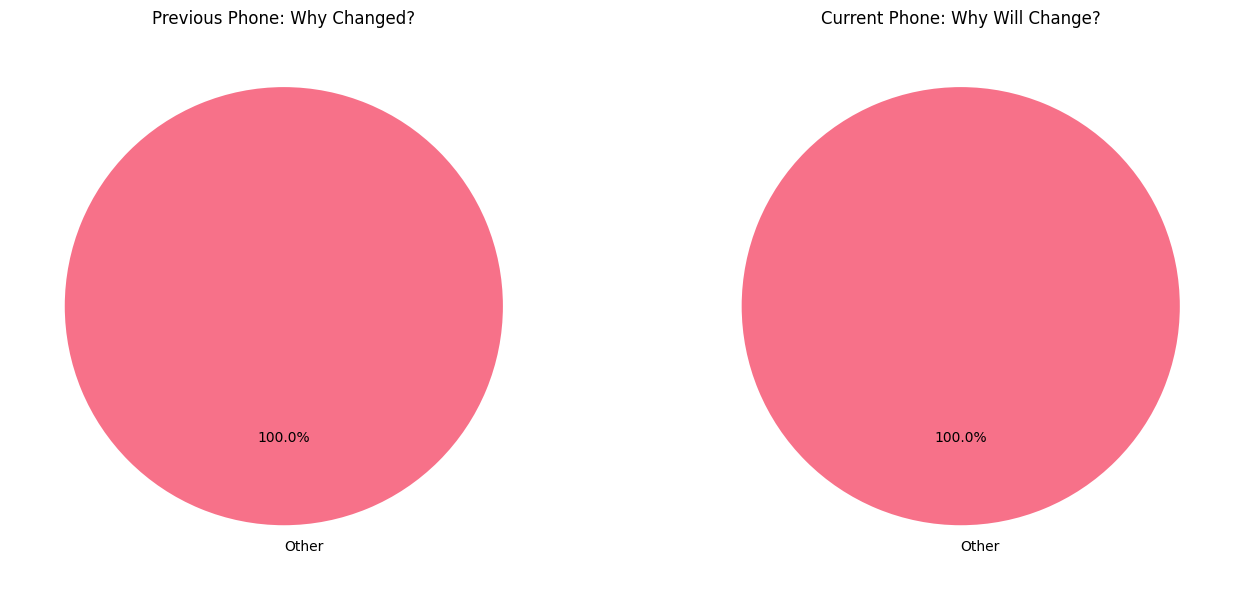

Previous phone replacement reasons:
  Other: 154 responses (100.0%)

Total previous phone responses: 154

Future phone replacement reasons:
  Other: 155 responses (100.0%)

Total future phone responses: 155

3. PHONE DISPOSITION ANALYSIS
----------------------------------------


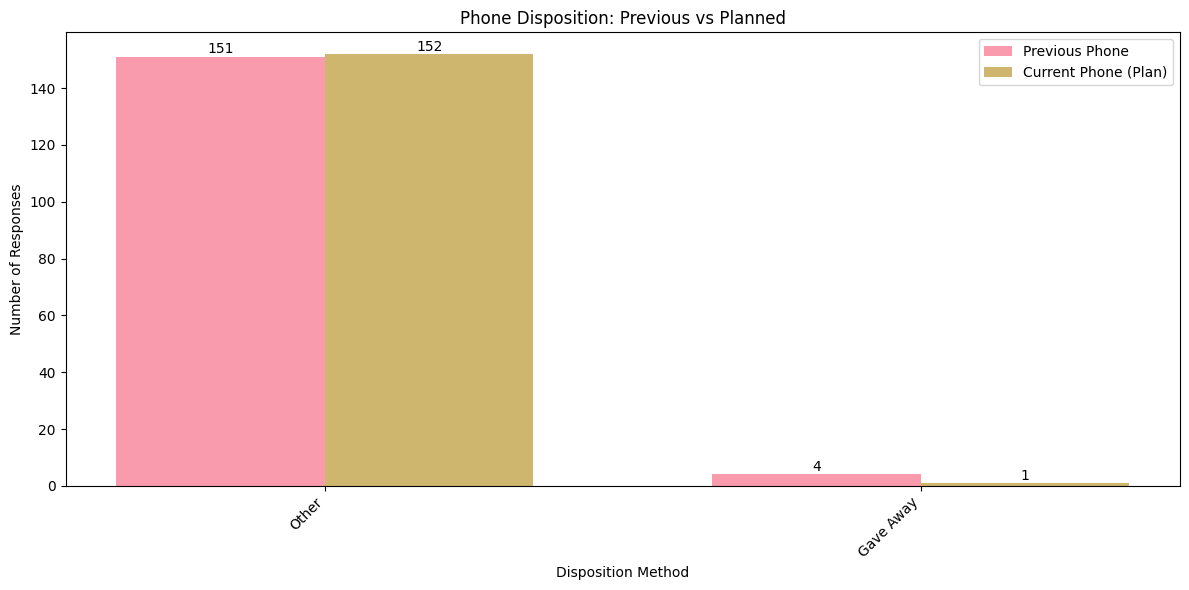

Previous phone disposition:
  Other: 151 responses (97.4%)
  Gave Away: 4 responses (2.6%)

Total previous disposition responses: 155

Planned current phone disposition:
  Other: 152 responses (99.3%)
  Gave Away: 1 responses (0.7%)

Total future disposition responses: 153

4. PHONE AGE vs REPLACEMENT TIMELINE
----------------------------------------
No valid timeline data available

=== SUMMARY STATISTICS ===
Total responses analyzed: 158


TypeError: Could not convert string ' I will replace the battery and continue using the phone)222122222221222121241922202221221922231924192220232326+2119192523222321232320232121202023222423232122221923211922242125232426+20251925252424232226+2424231922192424252225222020211925192122202221202424222118202322252122222325182526+21222323222223242022222120202122202421232526+20212121232222202422242323242319212126+252122' to numeric

In [11]:
# Run the analysis

# Save your data as a CSV file first, then run:
df_analyzed = analyze_phone_survey_data('answers_26-11_cleaned.csv')

# Additional summary statistics
print("=== SUMMARY STATISTICS ===")
print(f"Total responses analyzed: {len(df_analyzed)}")

# Calculate average age
age_data = df_analyzed.iloc[:, 1].dropna()
if len(age_data) > 0:
    print(f"Average age of respondents: {age_data.mean():.1f} years")
    print(f"Age range: {age_data.min()} - {age_data.max()} years")

# Phone brand analysis
brand_data = df_analyzed.iloc[:, 10].dropna()
if len(brand_data) > 0:
    brand_counts = brand_data.value_counts()
    print(f"\nPhone brands:")
    for brand, count in brand_counts.items():
        print(f"  {brand}: {count}")

# Phone age summary
phone_ages = df_analyzed['phone_age_years'].dropna()
if len(phone_ages) > 0:
    print(f"\nPhone age summary:")
    print(f"  Average: {phone_ages.mean():.1f} years")
    print(f"  Range: {phone_ages.min()} - {phone_ages.max()} years")